# First Decimal Point and Benford's Law
---

In this notebook, we'll be extracting the first decimal points after doing feature extraction to see if the first decimal points following the first digit distribution as stated by Benford's Law.

In [1]:
import numpy as np

In [2]:
import os

# Collect all file paths
dir_real = '../dataset/real'

real_files = [
    os.path.join(subdir, file)
    for subdir, _, files in os.walk(dir_real)
    for file in files
]

# Only collect 9 real files
real_files = real_files[:9]

In [3]:
import ImageForensics as ifo

N = 10000
extract = ifo.FeatureExtraction(features=N)

features = extract.fft_modified(real_files)

# Remove None results if any files failed to process
features = [result for result in features if result is not None]

In [4]:
def get_first_decimal_digit(number):
    # Convert the number to a string
    number_str = str(number)

    # Find the position of the decimal point
    decimal_pos = number_str.find(".")

    # If there is no decimal point, return None or handle as needed
    if decimal_pos == -1:
        return None

    # Extract the first decimal digit
    first_decimal_digit = number_str[decimal_pos + 1]

    # Convert the digit back to an integer
    return int(first_decimal_digit)

In [5]:
# Get first digit of each value
decimal_digits = [[get_first_decimal_digit(num) for num in array] for array in features]

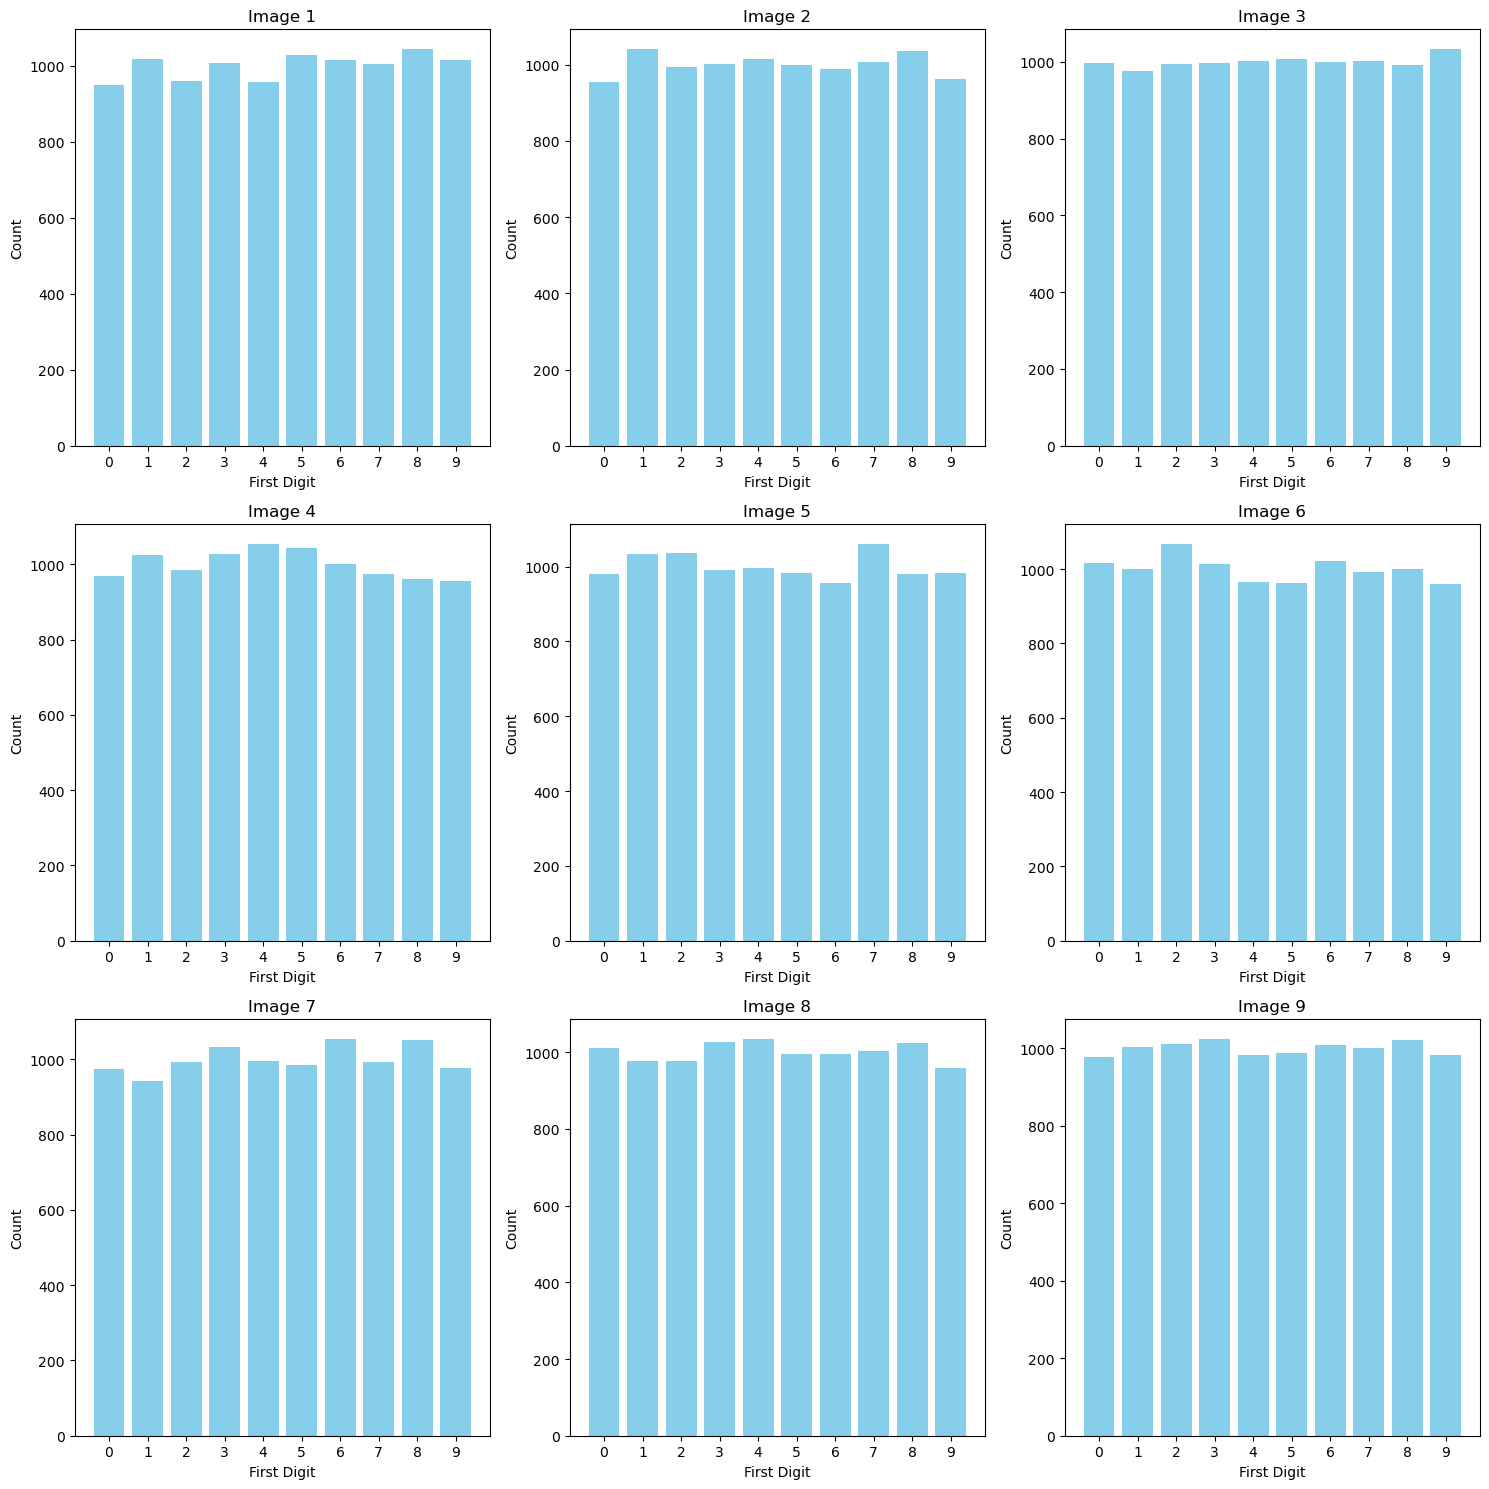

In [6]:
import matplotlib.pyplot as plt

# Count the occurrences of each first digit
first_digits_counts = [
    np.histogram(array, bins=np.arange(0, 11))[0] for array in decimal_digits
]

# Plot the subplots in 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the 2D array of axes to a 1D array
axs = axs.flatten()

# Loop through the first digit counts and the axes
for i, (counts, ax) in enumerate(zip(first_digits_counts, axs)):
    # Plot the bar chart
    ax.bar(np.arange(0, 10), counts, color='skyblue')

    # Set the title of the subplot
    ax.set_title(f"Image {i + 1}")

    # Set the x-axis label
    ax.set_xlabel("First Digit")

    # Set the y-axis label
    ax.set_ylabel("Count")

    # Set the x-ticks to 0-9
    ax.set_xticks(np.arange(0, 10))

    # Set the x-tick labels to 0-9
    ax.set_xticklabels(np.arange(0, 10))

# Adjust the layout
plt.tight_layout()

plt.show()

## Conclusion

After extracting 10000 features, we can see that the first decimal points do not follow a generalized Benford's Law. This is most likely because extracting the first decimal point would disobey the Generalized Benford's Law, since the law uses the first digit as an offset to calculate the probability of the trailing digits, and not the decimal point.